# Multi-linear

In [257]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [258]:
from sklearn.datasets import load_boston

In [259]:
boston=load_boston()


In [260]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)

In [261]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [262]:
df['Price']=boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [263]:
x=df.drop('Price',axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [264]:
y=df.drop("Price",axis=1)
y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [265]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [266]:
df['Price']=boston.target
df.shape

(506, 14)

In [267]:
df['Price']=boston.target
y=df['Price']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(len(x_train), len(x_test))

404 102


In [269]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [270]:
reg.intercept_

38.09169492630198

In [271]:
print("coffiect ",reg.coef_)


coffiect  [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


In [272]:
y_pred=reg.predict(x_test)
y_pred1=reg.predict(x_train)

In [273]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
r22=r2_score(y_train,y_pred1)
r22

0.7730135569264234

Text(0.5, 1.0, 'residual plot')

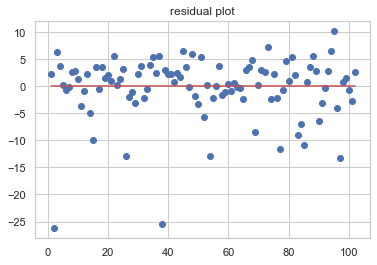

In [274]:
x=[i for i in range (1,len(y_pred)+1)]
x_plot=plt.scatter(x,(y_pred-y_test),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('residual plot')

In [275]:
val=x_train.columns


In [276]:
cof=pd.Series(reg.coef_,val).sort_values()

<AxesSubplot:>

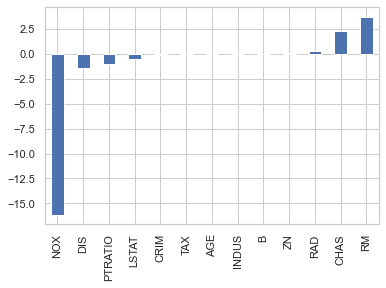

In [277]:
cof.plot(kind='bar')

In [278]:
# L2 Regu

In [279]:
redge= Ridge(alpha=0.01,normalize=True)

In [280]:
redge.fit(x_train,y_train)

Ridge(alpha=0.01, normalize=True)

In [281]:
pred=redge.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

In [282]:
print(rmse, r2)

5.813481888605881 0.5849537083296226


In [283]:
r2

0.5849537083296226

In [284]:
redge.coef_

array([-1.15518075e-01,  4.22094721e-02, -8.24654880e-03,  2.40094760e+00,
       -1.49682143e+01,  3.76460831e+00, -4.11563012e-03, -1.32526458e+00,
        2.12106950e-01, -9.53131507e-03, -1.02920464e+00,  8.11745097e-03,
       -4.84041201e-01])

In [286]:
df=pd.DataFrame(columns=['Liner col', 'Redg Linear'])

In [287]:
df

,Liner col,Redg Linear


In [288]:
for i in range(len(redge.coef_)):
    df=df.append({'Redg Linear':redge.coef_[i],'Liner col':reg.coef_[i]},ignore_index=True)

In [289]:
df

,Liner col,Redg Linear
0,-0.119443,-0.115518
1,0.044780,0.042209
2,0.005485,-0.008247
3,2.340804,2.400948
4,-16.123604,-14.968214
5,3.708709,3.764608
6,-0.003121,-0.004116
7,-1.386397,-1.325265
8,0.244178,0.212107
9,-0.010990,-0.009531


In [290]:
#Lasso
lassoredge= Lasso(alpha=0.0001,normalize=True)

In [291]:
lassoredge.fit(x_train,y_train)
pred=redge.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)
print(rmse ,r2)

5.813481888605881 0.5849537083296226


In [292]:
df=pd.DataFrame(columns=['Liner Reg', 'Redg Linear', 'Lasso Reg'])
df

,Liner Reg,Redg Linear,Lasso Reg


In [293]:
for i in range(len(redge.coef_)):
    df=df.append({'Liner Reg':reg.coef_[i],'Redg Linear':redge.coef_[i] ,'Lasso Reg':lassoredge.coef_[i]},ignore_index=True)

In [295]:
df

,Liner Reg,Redg Linear,Lasso Reg
0,-0.119443,-0.115518,-0.118717
1,0.044780,0.042209,0.044446
2,0.005485,-0.008247,0.002704
3,2.340804,2.400948,2.343184
4,-16.123604,-14.968214,-16.002413
5,3.708709,3.764608,3.711034
6,-0.003121,-0.004116,-0.002993
7,-1.386397,-1.325265,-1.380613
8,0.244178,0.212107,0.239950
9,-0.010990,-0.009531,-0.010781
